# Classification Metrics when we have to compare the two or more classifier

In [75]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Collection Libraries
from collections import Counter

# Preprocessing Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Algorithm Libraries
from sklearn.linear_model import LogisticRegression

# Metrics Libraries
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,plot_confusion_matrix,roc_auc_score

In [27]:
# Create a dataset of 10000 dataset
X,y = make_classification(n_samples=10000,random_state=32,weights=[.70])
print(X.shape,y.shape)
print(Counter(y))

(10000, 20) (10000,)
Counter({0: 6980, 1: 3020})


In [28]:
# Splitting the dataset
Xtrain , Xtest, ytrain,ytest = train_test_split(X,y,test_size = .2 , random_state=34,stratify=y)
print(Xtrain.shape , Xtest.shape, ytrain.shape,ytest.shape)

(8000, 20) (2000, 20) (8000,) (2000,)


## Model Training

### Logistic Regression

In [29]:
# importing the logistic Regression
clf1 = LogisticRegression()
# fitting the model
clf1.fit(Xtrain,ytrain)
# getting the predict proba
ypred_proba1 = clf1.predict_proba(Xtest)
# predicting the result
ypred1 = clf1.predict(Xtest)

print(ypred1)
print(ypred_proba1[:,1])

[1 0 0 ... 0 0 0]
[0.97992682 0.0250974  0.00851189 ... 0.00298158 0.04127374 0.06017939]


In [30]:
# ypred11 represent that it the prediction of the logistic regression when threshold is set different than the default here it is 0.7
ypred11 = np.array([0 if i<=0.7 else 1 for i in ypred_proba1[:,1]])
print(ypred11)

[1 0 0 ... 0 0 0]


### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# training the KNN model
clf2 = KNeighborsClassifier()
# fitting the model
clf2.fit(Xtrain,ytrain)
# getting the probability
ypred_proba2 = clf2.predict_proba(Xtest)
# Predicting the result
ypred2 = clf2.predict(Xtest)

print(ypred2)
print(ypred_proba2[:,1])

[1 0 0 ... 0 0 0]
[1.  0.  0.  ... 0.2 0.2 0.2]


In [33]:
ypred22 = np.array([0 if i<=0.7 else 1 for i in ypred_proba2[:,1]])
print(ypred22)

[1 0 0 ... 0 0 0]


### Performance Measurement

**Now we have Xtrain,ytrain,Xtest,ytest <br>
From logistic regression we have : ypred1,ypred11<br>
From KNN we have : ypred2,ypred22**

**Confusion Matrix** 

In [34]:
print("----LR----")
print(confusion_matrix(ytest,ypred1))
print("----KNN----")
print(confusion_matrix(ytest,ypred2))

----LR----
[[1321   75]
 [ 102  502]]
----KNN----
[[1351   45]
 [ 176  428]]


**Plotting the Confusion matrix**

Text(0.5, 24.0, 'Predicted Values')

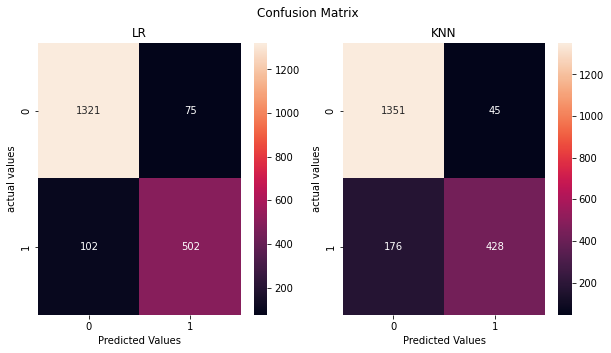

In [35]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
plt.suptitle("Confusion Matrix") # setting Super Title

sns.heatmap(confusion_matrix(ytest,ypred1),annot=True,ax=ax[0],fmt='g')

sns.heatmap(confusion_matrix(ytest,ypred2),annot=True,ax=ax[1],fmt='g')

# Setting title for each subplots
ax[0].set_title("LR")
ax[1].set_title("KNN")

# setting labels for each subplots
ax[0].set_ylabel("actual values")
ax[0].set_xlabel("Predicted Values")
ax[1].set_ylabel("actual values")
ax[1].set_xlabel("Predicted Values")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


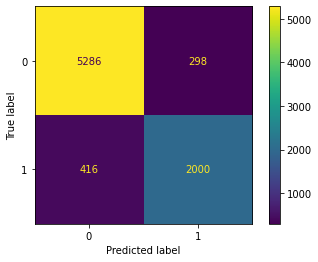

In [36]:
 # Plotting the Confusion matrix using the function
 plot_confusion_matrix(clf1,Xtrain,ytrain) # For training data

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'confusion Matrix')

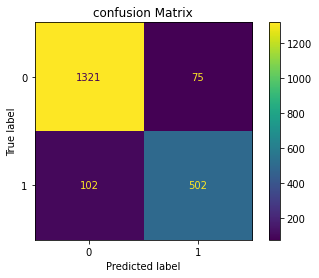

In [37]:
 # With Test Data
plot_confusion_matrix(clf1,Xtest,ytest)
plt.title("confusion Matrix")

**Accuracy** 

In [38]:
def accuracy(actual,predicted,comment="comment"):
  print("Accuracy Score for ",comment,"is","  :  ",   accuracy_score(actual,predicted))

In [39]:
accuracy(ytest,ypred1,comment="Logistic Regression with default threshold")
accuracy(ytest,ypred11,comment="Logistic Regression with custom threshold")
print()
accuracy(ytest,ypred2,comment="KNN with default threshold")
accuracy(ytest,ypred22,comment="KNN with custom threshold")

Accuracy Score for  Logistic Regression with default threshold is   :   0.9115
Accuracy Score for  Logistic Regression with custom threshold is   :   0.904

Accuracy Score for  KNN with default threshold is   :   0.8895
Accuracy Score for  KNN with custom threshold is   :   0.848


**Precision** 

True Postive / Predicted Positive = TP/(TP + FP)

In [40]:
def precision(actual,predicted):
  print(precision_score(actual,predicted))

In [41]:
print("-----Logistic Regression------")
precision(ytest,ypred1)
precision(ytest,ypred11)
print('----For KNN------')
precision(ytest,ypred2)
precision(ytest,ypred22)

-----Logistic Regression------
0.8700173310225303
0.9309623430962343
----For KNN------
0.904862579281184
0.9464285714285714


**Recall** 

True Positive / Actual Postive = TP/TP+FN

In [42]:
def recall(actual,predicted):
  print(recall_score(actual,predicted))

In [43]:
print("-----Logistic Regression------")
recall(ytest,ypred1)
recall(ytest,ypred11)
print('----For KNN------')
recall(ytest,ypred2)
recall(ytest,ypred22)

-----Logistic Regression------
0.8311258278145696
0.7367549668874173
----For KNN------
0.7086092715231788
0.5264900662251656


As we can see that with custom threshold:<br>
Logistic Regression:<br>
precision = 0.9309623430962343 and Recall = 0.7367549668874173<br>
KNN:<br>
precision = 0.9464285714285714 and Recall = 0.5264900662251656<br>
Here the Precision is higher in both cases but Recall have dropped particulary in case of KNN. i.e. Model is able to reduce the number of False Positve(FP) case but unable to reduce the number of False Negative(FN) cases.<br><br>
Now, the confusion is that how to measure which classifier is better than other becasue we can not use the accuracy because dataset is imbalanced, if we use precision then KNN is better than LR but we use Recall then LR is better than KNN.<br><br>
To deal with this confusion we will be using the F1-score and Auc_roc curve.

In [44]:
from sklearn.metrics import f1_score
print("F1-Score")
print("LR - with default threshold",f1_score(ytest,ypred1))
print("LR with custom threshold",f1_score(ytest,ypred11))
print("KNN with default threshold",f1_score(ytest,ypred2))
print("KNN with custom threshold",f1_score(ytest,ypred22))

F1-Score
LR - with default threshold 0.8501270110076206
LR with custom threshold 0.822550831792976
KNN with default threshold 0.7948003714020427
KNN with custom threshold 0.6765957446808512


Now as we have the single number which can help us to compare different models

**AUC_ROC** <br>

Returns the Area Under the Curve

In [51]:
print("----FOR LOGISTIC REGRESSION-----")
print("Default threshold :",roc_auc_score(ytest,ypred1))
print("Cusotm threshold :",roc_auc_score(ytest,ypred11))
print("----FOR KNN ----")
print("Default threshold :",roc_auc_score(ytest,ypred2))
print("Cusotm threshold :",roc_auc_score(ytest,ypred22))

----FOR LOGISTIC REGRESSION-----
Default threshold : 0.8887004497239037
Cusotm threshold : 0.8565579992030209
----FOR KNN ----
Default threshold : 0.8381871572515607
Cusotm threshold : 0.7567980417085713


**--------- Plotting the auc_roc_curve----------**

In [53]:
from sklearn.metrics import roc_curve

In [56]:
fpr,tpr,threshold = roc_curve(ytest,ypred1)
print(threshold)

[2 1 0]


**Always pass the second argument to roc_curve as probability because for each unique probabilities it calculates a threshold and on that threhold it calculates the predicted out , compares it to the actual output and return the fpr and tpr for that particular threshold.**

In [58]:
fpr,tpr,threshold = roc_curve(ytest,ypred_proba1[:,1])
print(threshold[:7]) # Printing the first 7 threshold

[1.99996244 0.99996244 0.99636544 0.99632182 0.99283193 0.99280066
 0.98588067]


In [62]:
# Creating data using all those fpr,tpr and threshold
d = {'fpr':fpr,
     'tpr':tpr,
     'threshold':threshold}
df_lr = pd.DataFrame(d)
df_lr

,fpr,tpr,threshold
0,0.000000,0.000000,1.999962
1,0.000000,0.001656,0.999962
2,0.000000,0.104305,0.996365
3,0.000716,0.104305,0.996322
4,0.000716,0.162252,0.992832
...,...,...,...
267,0.685530,0.996689,0.008949
268,0.685530,0.998344,0.008948
269,0.699857,0.998344,0.008145
270,0.699857,1.000000,0.008112


In [64]:
#For KNN
fpr2,tpr2,threshold2 = roc_curve(ytest,ypred_proba2[:,1])
print(threshold2[:7]) # Printing the first 7 threshold
# Creating data using all those fpr,tpr and threshold
d2 = {'fpr':fpr2,
     'tpr':tpr2,
     'threshold':threshold2}
df_knn = pd.DataFrame(d2)
df_knn

[2.  1.  0.8 0.6 0.4 0.2 0. ]


,fpr,tpr,threshold
0,0.000000,0.000000,2.0
1,0.003582,0.294702,1.0
2,0.012894,0.526490,0.8
3,0.032235,0.708609,0.6
4,0.110315,0.847682,0.4
5,0.345989,0.945364,0.2
6,1.000000,1.000000,0.0


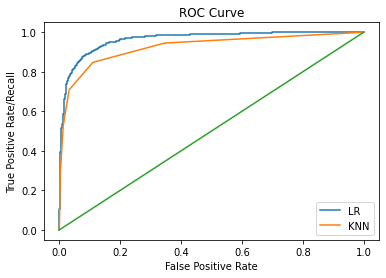

In [72]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

plt.plot(fpr,tpr,label="LR")
plt.plot(fpr2,tpr2,label='KNN')
plt.plot(p_fpr,p_tpr)

plt.ylabel("True Positive Rate/Recall")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.legend()

AS we can see that Area under the LR is greater than the KNN. so clf1 is better than the clf2.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


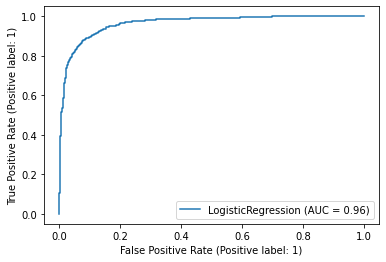

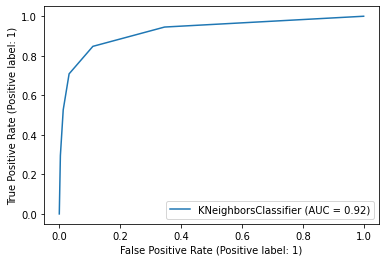

In [74]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
# Ploting using the function
plot_roc_curve(clf1,Xtest,ytest)
plot_roc_curve(clf2,Xtest,ytest)

**We can see a difference that when Area was calculated through roc_auc_score then area was less than when we plotted the graph using the roc_curve function because in roc_auc_score we passed the actual and predicted target values but in case of roc_curve it calculates the area with the best threshold and that's why there is a differnce**

**Classification Report**

In [76]:
from sklearn.metrics import classification_report

In [82]:
lr_default_threshold=classification_report(ytest,ypred1)
lr_custom_threshold=classification_report(ytest,ypred11)

In [83]:
print(lr_default_threshold)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1396
           1       0.87      0.83      0.85       604

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



In [84]:
print(lr_custom_threshold)

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1396
           1       0.93      0.74      0.82       604

    accuracy                           0.90      2000
   macro avg       0.91      0.86      0.88      2000
weighted avg       0.91      0.90      0.90      2000



In [85]:
knn_default_threshold=classification_report(ytest,ypred2)
knn_custom_threshold=classification_report(ytest,ypred22)

In [86]:
print(knn_default_threshold)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1396
           1       0.90      0.71      0.79       604

    accuracy                           0.89      2000
   macro avg       0.89      0.84      0.86      2000
weighted avg       0.89      0.89      0.89      2000



In [88]:
print(knn_custom_threshold)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1396
           1       0.95      0.53      0.68       604

    accuracy                           0.85      2000
   macro avg       0.89      0.76      0.79      2000
weighted avg       0.86      0.85      0.83      2000



--------------------------------------------- X ---------------------------------------------